In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

from torch import tensor
from torch import cat
from torch import clamp
from torch.distributions import normal
from torch import nn
import torch.nn.functional as F
from torch import optim
from torch.utils.tensorboard import SummaryWriter
import torch

import gym

In [2]:
num_iterations = 1000000
replay_memory_max_size = 100000
sigma = 0.2
minibatch_size = 64
discount_rate = 0.99
steps_until_policy_update = 2
target_update_ratio = 0.0005
epsilon_limit = 0.5
min_action = -2
max_action = 2

In [3]:
device = torch.device("cpu")
cpu_device = torch.device("cpu")

class TD3LunarLanderContinuousActorNN(nn.Module):
    def __init__(self):
        super(TD3LunarLanderContinuousActorNN, self).__init__()
        self.fc1 = nn.Linear(8, 100)
        self.fc2 = nn.Linear(100, 100)
        self.fc3 = nn.Linear(100, 2)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = torch.tanh(self.fc3(x))
        return x

In [4]:
actor_net = TD3LunarLanderContinuousActorNN()

In [5]:
actor_net.load_state_dict(torch.load("./models/current/TD3-LunarLanderContinuous-v2-actor_net.pkl"))
actor_net = actor_net.to(device)

In [6]:
env = gym.make('LunarLanderContinuous-v2')
render = True
num_eval_episodes = 100

obs = env.reset()
episode_rewards = []
episode_reward = 0
while len(episode_rewards) < num_eval_episodes:
    action = actor_net(tensor(obs).float().to(device)).detach().to(cpu_device).numpy().squeeze()
    obs, reward, done, _ = env.step(action)
    episode_reward += reward
    if done:
        episode_rewards.append(episode_reward)
        episode_reward = 0
        obs = env.reset()
    if render:
        env.render()

episode_rewards = np.asarray(episode_rewards)

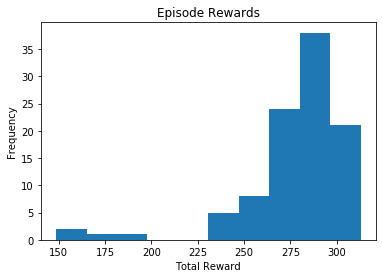

In [7]:
plt.title("Episode Rewards")
plt.xlabel("Total Reward")
plt.ylabel("Frequency")
plt.hist(episode_rewards)
plt.show()

In [8]:
print("Mean total episode reward:", np.mean(episode_rewards))

Mean total episode reward: 277.0992944736884
